# > Introdução
## Descrição dos Dados

Essa semana o projeto da Semana apresentará uma função de processamento e tratamento de dados de um arquivo csv chamado Titanic.
Nesse arquivo contém uma tabela com informações sobre dados do naufrágio do Titanic e também dados sobre os passageiros e classes que tinham no navio.
A tabela contém 891 linhas e 
A tabela contém as seguintes colunas: PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.
Originalmente as colunas tem valores nulos, no qual será tratado esses valores para aqui nesse arquivo ser apresentado em gráficos o melhor entendimento da relação entre os dados dessa tabela.

# > Processamento
## Import da Biblioteca Pandas e Numpy, Leitura, Função de Processamento e 
## Tratamento dos dados

In [134]:
import pandas as pd
import numpy as np

In [135]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Tratamento de dados

- Contagem de dados nulos
- Excluir a coluna que tem a maior quantidade de campos nulos
- Sort da idade das pessoas de forma crescente
- Filtro Baseado em uma única condição para exibir resgistros de pessoas acima de 60 anos
- Filtro com Múltiplas Condições exibindo registros Mulheres Maiores de 60 anos
- Filtro de Busca com a função isin para encontrar registros de pessoas que estraram pelo portão de embarque "C".
- Utilizando a função query para indentificar  registros de pessoas com Idade = 18 anos.
- Realizar agrupamento de Passageiros por Idade < 18 anos.



In [136]:

def processamento (df): 

# Contagem de dados nulos 
  df_contagem_null= (df.isna().sum())
  
# Excluindo a coluna Cabin que tem a maior quantidade de campos nulos

  df_excluir_coluna = df.drop(columns="Cabin")
 
# Sort da Idade das pessoas de forma crescente
  df_sort_cresc = df.sort_values(by=['Age']).reset_index()

# Filtro Baseado em uma única condição para exibir resgistro de pessoas acima de 60 anos
  df_filtrado_oneC = df[df['Age'] >= 60]
  df_filtrado_oneC.head()
  
# Filtro com Múltiplas Condições exibindo regristos de Mulheres maiores que 60 anos

  df_filtrado_MultC = df[(df['Age'] > 60) & (df['Sex'] == 'female')]
  df_filtrado_MultC.head()

# Filtro de busca com a função isin para encontrar registros de pessoas que entraram pelo portão de embarque C

  df_filtro = df[df['Embarked'].isin(['C'])]
  df_filtro.head()

# Uma função de seleção (query) para identificar registros de pessoas com idade == 18 anos
  df_consulta = df.query("Age == 18")
  df_consulta.head()
  
# Realizar um agrupamento de Passageiros por Idade < 18 anos.
  df_agrupamento = df.loc[(df['Age'] <18)]
  df_agrupamento.groupby('Sex')['PassengerId']
  
  return (df_contagem_null,  df_excluir_coluna, df_sort_cresc, df_filtrado_oneC, df_filtrado_MultC, df_filtro, df_consulta,df_agrupamento)



    

In [137]:
df_contagem_null,  df_excluir_coluna, df_sort_cresc, df_filtrafo_oneC, df_filtrado_MultC,df_filtro, df_consulta, df_agrupamento = processamento(df)

In [138]:
df_contagem_null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [139]:
df_excluir_coluna

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [140]:
df_sort_cresc

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
1,755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
2,644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
3,469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
4,78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
887,863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
888,868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
889,878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [141]:
df_filtrafo_oneC


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C


In [142]:
df_filtrado_MultC

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


In [143]:
df_filtro

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [144]:
df_consulta

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
144,145,0,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.5000,NaN,S
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S
228,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.0000,NaN,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5000,NaN,S
417,418,1,2,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.0000,NaN,S


In [145]:
df_agrupamento

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


# > Visualizações / Insigts
- Exibir um Gráfico Pizza mostrando o Percentual de Sobreviventes e Não Sobreviventes
- Exibir um Gráfico Barra mostrando o valor arrecadado por cada classe;
- Exibir um Gráfico Barra na Horizontal para mostrar a quantidade mulheres que sobreviveram
- Exibir um Gráfico Histograma para mostrar a distribuição de tarifas cobradas no Titanic.


### Import da Biblioteca Matplot 

A biblioteca Matplot é utilizada para gerar gráficos.

In [211]:
import matplotlib.pyplot as plt
%matplotib inline

UsageError: Line magic function `%matplotib` not found.


## Código para mostragem dos gráficos e visualização dos gráficos. 
### Obrigatório no mínimo 3 gráficos diferentes.

In [209]:
import numpy as np

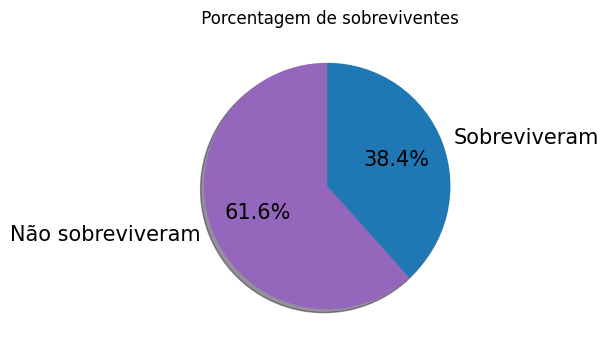

In [217]:
#Gráfico Pizza Mostrando o Percentual de Sobreviventes e Não Sobreviventes
df['Survived'].value_counts().plot.pie(colors=('tab:purple', 'tab:blue'),  title=' Porcentagem de sobreviventes', fontsize=15, shadow=True, startangle=90, autopct='%1.1f%%', 
                                       labels=('Não sobreviveram','Sobreviveram'),
                                       figsize=(6,4)).set_ylabel('')


sobreviventes = df['Survived'].value_counts()
total = sobreviventes.sum()
nao_sobreviventes = sobreviventes[0]
sobreviventes = sobreviventes[1]

def calc_percentual(sobreviventes, total):

    print('{0}% sobreviveram e {1}% não sobreviveram'
      .format(calc_percentual(sobreviventes, total), calc_percentual(nao_sobreviventes, total)))

Text(0.5, 1.0, 'Valor de Dinheiro Arrecadado por Classe')

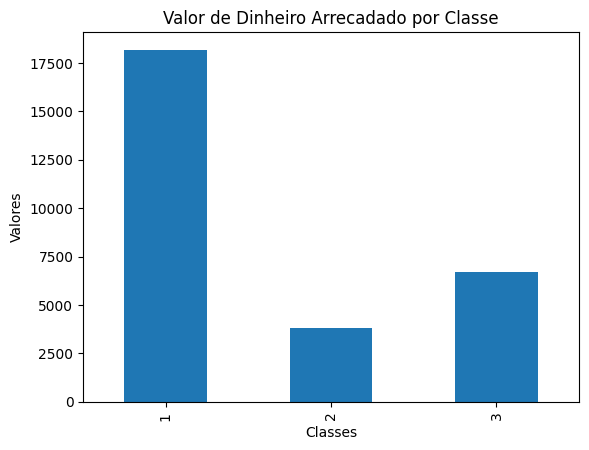

In [163]:
#Gráfico Barra Exibindo Valor arrecadado por cada Classe.
dado_agrupado = df.groupby('Pclass')
dado_agrupado

valor_arrecadado = dado_agrupado['Fare'].sum()
valor_arrecadado.plot(kind='bar');

plt.xlabel('Classes')
plt.ylabel('Valores')
plt.title('Valor de Dinheiro Arrecadado por Classe')

Apenas 233 mulheres sobreviveram e 81 não sobreviveram


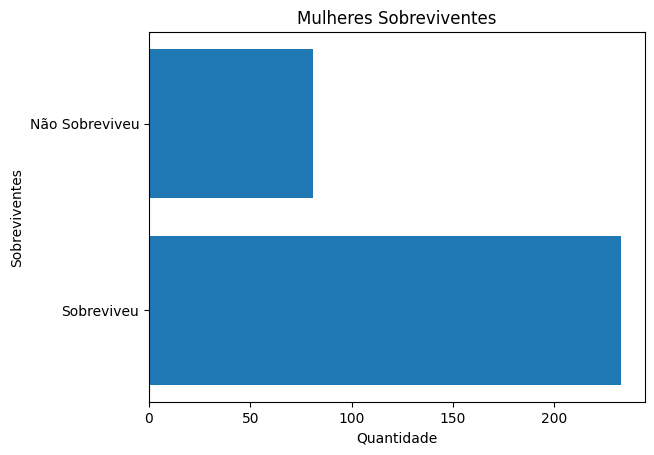

In [226]:
#Exibição de um gráfico Barra na Horizontal para mostrar a quantidade mulheres que sobreviveram
mulheres_sobreviventes = df[df['Sex'] == "female"]["Survived"]


locations = [1, 2]
heights = mulheres_sobreviventes.value_counts()
labels = ['Sobreviveu', 'Não Sobreviveu']
plt.barh(locations, heights, tick_label=labels)
plt.title('Mulheres Sobreviventes')
plt.xlabel('Quantidade')
plt.ylabel('Sobreviventes')


print('Apenas {0} mulheres sobreviveram e {1} não sobreviveram'
      .format(mulheres_sobreviventes.value_counts()[1], mulheres_sobreviventes.value_counts()[0]))






Text(0.5, 1.0, 'Distribuição de Tarifas  ')

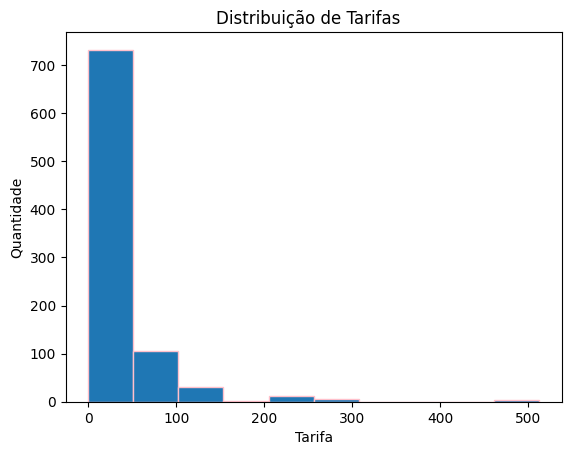

In [229]:
# Exibição de um histograma trazendo a distribuição de Tarifas Cobradas no Titanic
df['Fare'].plot.hist(bins=10, edgecolor='pink')

plt.xlabel('Tarifa')
plt.ylabel('Quantidade')
plt.title('Distribuição de Tarifas  ')

## Ideias/ Insigts
- valor médio do tíquete para cada classe
- porcentagem de sobreviventes entre os idosos
- porcentagem de sobreviventes entre as crianças
- porcentagem de sobreviventes entre as mulheres
- porcentagem de sobreviventes entre os homens
- idade da vítima mais nova
- idade da vítima mais velha
- qual família teve mais sobreviventes